### **Langkah 1 - _Import Library_**

_Import library_ yang dibutuhkan.

In [12]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **Langkah 2 - _Load_ dan Inspeksi Data**

Pada tahap ini, kita akan memuat data ke dalam _dataframe_ kemudian melakukan inspeksi data untuk 5 data pertama.

In [13]:
df: pd.DataFrame = pd.read_csv('../data/Iris.csv') # type: ignore
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Selanjutnya, lakukan inspeksi _profile data_,

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **Langkah 3 - Seleksi Fitur**

Dikarenakan kita hanya membutuhkan fitur untuk proses klasterisasi, maka kita perlu memisahkan antara fitur dan label dengan menggunakan proses _slicing data_.

In [15]:
# Features Selection
X: pd.DataFrame = df.iloc[:, 1:-1] # slice the features
y: pd.Series = df.iloc[:, -1] # this is the labels (we don't need it)

Jika Anda perhatikan pada baris ke-2, _index slicing_ yang digunakan adalah `[:,1:-1]`, artinya kolom `Id` dan `Species (label)` tidak digunakan.

Cek data fitur dengan cara,

In [16]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


### **Langkah 4 - _Plotting_**

Pada tahap ini, kita akan melakukan proses _plot_ menggunakan _scatter plot_ untuk melihat sebaran data berdasarkan 2 fitur, yaitu `SepalLengthCm` dan `SepalWidthCm`.

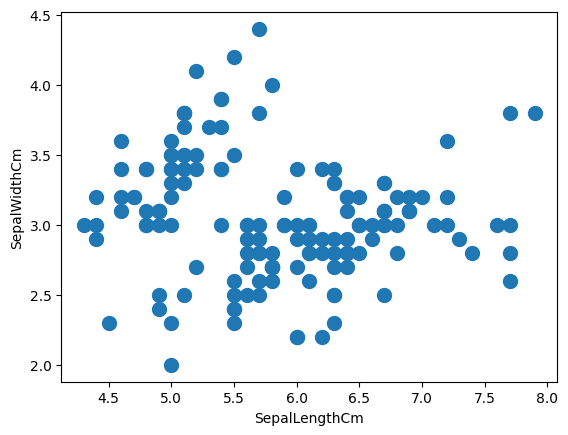

In [17]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm

plt.xlabel('SepalLengthCm') # type: ignore
plt.ylabel('SepalWidthCm') # type: ignore
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100) # type: ignore

Jika diperhatikan secara visual, kita mungkin dapat berasumsi bahwa terdapat dua _cluster_ pada data.

### **Langkah 5 - Membuat Model K-Means**

Selanjutnya, kita akan membuat model K-Means dengan asumsi terdapat dua _cluster_ sesuai dengan amatan visual pada _scatter plot_.

In [18]:
# Build a K-Means Model
# Based on visual inspection using scatterplot, 
# we can assumpt that the data has 2 cluster 
# (even though, from the label, there are 3 labels in this data) 

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

Setelah model mempelajari data yang kita miliki melalui fungsi `fit_predict()`, kita dapat melakukan pengecekan hasil klasterisasi dengan memanfaatkan _scatter plot_.

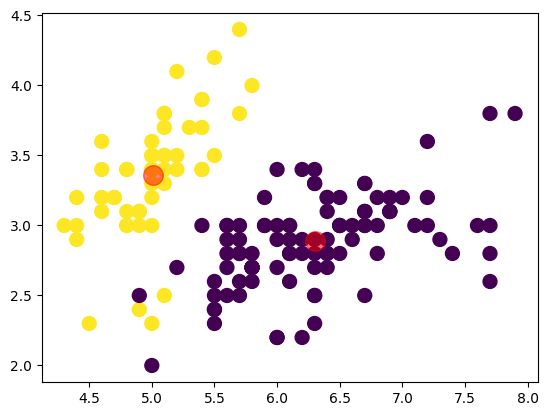

In [19]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans) # type: ignore

# Plot the centroid
centers: np.ndarray = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5) # type: ignore

### **Langkah 6 - Evaluasi Model**

Untuk mengetahui apakah model klasterisasi yang dihasilkan memiliki performa yang baik, maka kita akan melakukan proses evaluasi. Nilai metrik evaluasi yang dapat kita gunakan salah satunya adalah _**sum of square error**_ (`SSE`). Untuk mendapatkan nilai `SSE`, kita cukup mengakses properti `inertia_` dari objek K-Means yang telah dilatih sebelumnya.

In [20]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


### **Langkah 7 - Menentukan `k` terbaik dengan _Elbow Method_**

Pada pembuatan model klasterisasi, jika kita masih belum menentukan jumlah _cluster_ yang akan digunakan, maka kita dapat menggunakan _elbow method_ untuk mendapatkan jumlah _cluster_ yang terbaik. Cara kerja _elbow method_ cukup sederhana, yaitu,

- Tentukan rentang `k` yang ingin dievaluasi.
- Kalkulasi nilai `SSE` untuk setiap nilai `k` pada rentang yang telah ditentukan.
- Buat grafik _line plot_ untuk mendapatkan visualisasi sebagai dasar justifikasi.

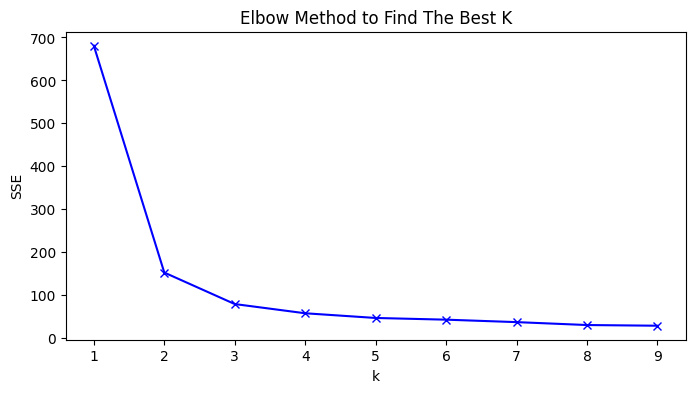

In [21]:
# Find the best k
# using Elbow Method

# List SSE values
sse: list[float] = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4)) # type: ignore
plt.plot(K, sse, "bx-") # type: ignore
plt.xlabel("k") # type: ignore
plt.ylabel("SSE") # type: ignore
plt.title("Elbow Method to Find The Best K") # type: ignore
plt.show() # type: ignore

Berdasarkan hasil _line plot_ `SSE` untuk setiap `k`, maka kita dapat berargumen bahwa nilai `k` terbaik adalah 3. Mengapa `k = 3`? Hal ini dikarenakan pada nilai `k = 2` nilai `SSE` masih terlalu tinggi dibandingkan dengan `k = 4`, sedangkan, misal `k = 8` sangat rendah. Jumlah _cluster_ terbaik bukan karena nilai `SSE` yang rendah. `SSE` pasti aka semakin mengecil seiring dengan jumlah _cluster_ yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap _cluster_ juga semakin mengecil dan _cluster_ otomatis lebih sempit. Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai `k` telah turun dengan tajam diikuti dengan penurunan yang lebih stabil. Posisi inilah yang dikenal dengan posisi `"elbow"`. Dalam konteks fitur yang kita gunakan saat ini, nilai `k = 3` menjadi nilai yang paling optimal.